## Problem Definition
- Database connection to Sqlite
- Data Cleaning and Manipulation
- Identifying trends and analysis
- Insights
- Conclusion

## Connecting to sqlite Database

In [1]:
# Importing Pandas and sqlite

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# To connect to the database

conn = r"C:\Users\SALAMAH ALAWIYE\OneDrive - AfyA Care Nigeria\DESKTOP\3SIGNET\WEEK 7\ABC PHARMA.db"
connection = sqlite3.connect(conn)

In [3]:
# Creating a cursor to enable the execution of sql queries like Insert, Select, Update;
# To fetch data from the database ;
# To create rows of the result of the query etc.

cursor = connection.cursor()

In [4]:
cursor.execute("SELECT * FROM Fdata")

#fetching all the rows
rows = cursor.fetchall()

columns = [desc[0] for desc in cursor.description]
Fdata = pd.DataFrame(rows, columns=columns)

print(Fdata.head(5))

    CustID   DepID ChannelID   LocID ProductID  Quantity  DisID  Price  Sales  \
0   Cust01   Dep01     CH001   Loc01     PR001         4  Dis01    368   1472   
1  Cust041  Dep012     CH003  Loc041     PR001         2  Dis01    368    736   
2   Cust01   Dep09     CH001   Loc01    PR0056        30  Dis01     26    780   
3   Cust02   Dep02     CH002   Loc02     PR002         7  Dis01    591   4137   
4  Cust038  Dep012     CH001  Loc038     PR002         4  Dis01    591   2364   

   Year    Month  
0  2018  January  
1  2018  January  
2  2018  January  
3  2018  January  
4  2018  January  


## Data Cleaning and Preprocessing

### Fdata Table cleaning

In [5]:
# To create a tabular view of the data, pandas was used

#To view the Facts table
Md = "SELECT * FROM Fdata"
Mdata = pd.read_sql_query(Md, connection)
Mdata.head(5)

,CustID,DepID,ChannelID,LocID,ProductID,Quantity,DisID,Price,Sales,Year,Month
0,Cust01,Dep01,CH001,Loc01,PR001,4,Dis01,368,1472,2018,January
1,Cust041,Dep012,CH003,Loc041,PR001,2,Dis01,368,736,2018,January
2,Cust01,Dep09,CH001,Loc01,PR0056,30,Dis01,26,780,2018,January
3,Cust02,Dep02,CH002,Loc02,PR002,7,Dis01,591,4137,2018,January
4,Cust038,Dep012,CH001,Loc038,PR002,4,Dis01,591,2364,2018,January


In [6]:
# To check for duplicates
Mdd = Mdata[Mdata.duplicated()]
print(Mdd)


          CustID   DepID ChannelID    LocID ProductID  Quantity   DisID  \
24328   Cust0109   Dep01     CH002  Loc0109   PR00225        10   Dis03   
57178   Cust0600   Dep02     CH004  Loc0600    PR0080        30  Dis015   
140251  Cust0588   Dep09     CH003  Loc0588   PR00111        10  Dis014   
177689  Cust0744  Dep012     CH003  Loc0742   PR00128        10  Dis014   

        Price  Sales  Year      Month  
24328     386   3860  2018  September  
57178      25    750  2017      April  
140251    113   1130  2018    October  
177689    416   4160  2019       June  


In [7]:
#To view the entire duplicates and confirm

Mdata[Mdata.duplicated(keep=False)]

,CustID,DepID,ChannelID,LocID,ProductID,Quantity,DisID,Price,Sales,Year,Month
13821,Cust0109,Dep01,CH002,Loc0109,PR00225,10,Dis03,386,3860,2018,September
24328,Cust0109,Dep01,CH002,Loc0109,PR00225,10,Dis03,386,3860,2018,September
53977,Cust0600,Dep02,CH004,Loc0600,PR0080,30,Dis015,25,750,2017,April
57178,Cust0600,Dep02,CH004,Loc0600,PR0080,30,Dis015,25,750,2017,April
137363,Cust0588,Dep09,CH003,Loc0588,PR00111,10,Dis014,113,1130,2018,October
140251,Cust0588,Dep09,CH003,Loc0588,PR00111,10,Dis014,113,1130,2018,October
173838,Cust0744,Dep012,CH003,Loc0742,PR00128,10,Dis014,416,4160,2019,June
177689,Cust0744,Dep012,CH003,Loc0742,PR00128,10,Dis014,416,4160,2019,June


In [8]:
#To drop the duplicates and return the no. of duplicates removed

deduplicated = Mdata.drop_duplicates()
print(Mdata.shape[0] - deduplicated.shape[0])  


4


In [9]:
#To check the datatype

Mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   CustID     254082 non-null  object
 1   DepID      254082 non-null  object
 2   ChannelID  254082 non-null  object
 3   LocID      254082 non-null  object
 4   ProductID  254082 non-null  object
 5   Quantity   254082 non-null  int64 
 6   DisID      254082 non-null  object
 7   Price      254082 non-null  int64 
 8   Sales      254082 non-null  int64 
 9   Year       254082 non-null  int64 
 10  Month      254082 non-null  object
dtypes: int64(4), object(7)
memory usage: 21.3+ MB


In [10]:
# To check for null/missing values in Fdata table

Mdata.info()
print(Mdata.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   CustID     254082 non-null  object
 1   DepID      254082 non-null  object
 2   ChannelID  254082 non-null  object
 3   LocID      254082 non-null  object
 4   ProductID  254082 non-null  object
 5   Quantity   254082 non-null  int64 
 6   DisID      254082 non-null  object
 7   Price      254082 non-null  int64 
 8   Sales      254082 non-null  int64 
 9   Year       254082 non-null  int64 
 10  Month      254082 non-null  object
dtypes: int64(4), object(7)
memory usage: 21.3+ MB
CustID       0
DepID        0
ChannelID    0
LocID        0
ProductID    0
Quantity     0
DisID        0
Price        0
Sales        0
Year         0
Month        0
dtype: int64


### Channel Table cleaning

In [11]:
# To create a tabular view of the data, pandas was used

#To view the Channels table
Ch = "SELECT * FROM Dimchannel"
Dchannel = pd.read_sql_query(Ch, connection)
Dchannel.head(5)

,ChannelID,Channel,SubChannel
0,CH001,Hospital,Private
1,CH002,Pharmacy,Retail
2,CH003,Pharmacy,Institution
3,CH004,Hospital,Government


In [12]:
Dchannel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ChannelID   4 non-null      object
 1   Channel     4 non-null      object
 2   SubChannel  4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [13]:
# To check for duplicates

if Dchannel.duplicated().any():
    print("Duplicates found:")
    print(Dchannel[Dchannel.duplicated()])
else:
    print("No duplicates found.")


No duplicates found.


In [14]:
# To check for null/missing values in Channel table

Dchannel.info()
print(Dchannel.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ChannelID   4 non-null      object
 1   Channel     4 non-null      object
 2   SubChannel  4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes
ChannelID     0
Channel       0
SubChannel    0
dtype: int64


### Customer Table cleaning

In [15]:
# To create a tabular view of the data, pandas was used

#To view the Customer table
Cus = "SELECT * FROM Dimcustomer"
Dcust = pd.read_sql_query(Cus, connection)
Dcust.head(5)

,CustID,Customer Name
0,Cust01,"Zieme, Doyle and Kunze"
1,Cust02,Feest PLC
2,Cust03,Medhurst-Beer Pharmaceutical Limited
3,Cust04,Barton Ltd Pharma Plc
4,Cust05,Keeling LLC Pharmacy


In [16]:
Dcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustID         751 non-null    object
 1   Customer Name  751 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [17]:
if Dcust.duplicated().any():
    print("Duplicates found:")
    print(Dcust[Dcust.duplicated()])
else:
    print("No duplicates found.")


No duplicates found.


In [18]:
#To check for null/missing values

Dcust.info()
print(Dcust.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustID         751 non-null    object
 1   Customer Name  751 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB
CustID           0
Customer Name    0
dtype: int64


### Department Table cleaning

In [19]:
# To create a tabular view of the data, pandas was used

#To view the Customer table
Dp= "SELECT * FROM DimDepartment"
Dep = pd.read_sql_query(Dp, connection)
Dep.head(5)

,DepID,Name_of_Sales_Rep,Manager,SalesTeam
0,Dep01,Mary Gerrard,Britanny Bold,Delta
1,Dep02,Jessica Smith,Britanny Bold,Delta
2,Dep03,Steve Pepple,Tracy Banks,Bravo
3,Dep04,Anne Wu,Britanny Bold,Delta
4,Dep05,Thompson Crawford,James Goodwill,Alfa


In [20]:
Dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DepID              13 non-null     object
 1   Name_of_Sales_Rep  13 non-null     object
 2   Manager            13 non-null     object
 3   SalesTeam          13 non-null     object
dtypes: object(4)
memory usage: 544.0+ bytes


In [21]:
#To check for duplicates

if Dep.duplicated().any():
    print("Duplicates found:")
    print(Dep[Dep.duplicated()])
else:
    print("No duplicates found.")


No duplicates found.


### Distributor's Table cleaning

In [22]:
# To create a tabular view of the data, pandas was used

#To view the Distributor's table
Ds = "SELECT * FROM DimDistributor"
Dis = pd.read_sql_query(Ds, connection)
Dis.head(5)

,Distributor,DisID
0,Gottlieb-Cruickshank,Dis01
1,Carter-Conn,Dis02
2,Prohaska-Kuhic,Dis03
3,Smith Inc,Dis04
4,Rohan,Dis05


In [23]:
Dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Distributor  29 non-null     object
 1   DisID        29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [24]:
#To check for duplicates

if Dis.duplicated().any():
    print("Duplicates found:")
    print(Dis[Dis.duplicated()])
else:
    print("No duplicates found.")


No duplicates found.


In [25]:
# To check for null/missing values in Distributor's table

Dis.info()
print(Dis.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Distributor  29 non-null     object
 1   DisID        29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes
Distributor    0
DisID          0
dtype: int64


### Location Table cleaning

In [26]:
# To create a tabular view of the data, pandas was used

#To view the Distributor's table
Lc = "SELECT * FROM DimLocation"
Loc = pd.read_sql_query(Lc, connection)
Loc.head(5)

,LocID,City,Longitude,Country,Latitude
0,Loc01,Lublin,22.57,Poland,51.23
1,Loc02,?wiecie,18.43,Poland,53.42
2,Loc03,Rybnik,18.50,Poland,50.08
3,Loc04,Czelad?,19.08,Poland,50.33
4,Loc05,Olsztyn,20.49,Poland,53.78


In [27]:
Loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LocID      749 non-null    object 
 1   City       749 non-null    object 
 2   Longitude  749 non-null    float64
 3   Country    749 non-null    object 
 4   Latitude   749 non-null    float64
dtypes: float64(2), object(3)
memory usage: 29.4+ KB


In [28]:
if Loc.duplicated().any():
    print("Duplicates found:")
    print(Loc[Loc.duplicated()])
else:
    print("No duplicates found.")


No duplicates found.


In [29]:
# To check for null/missing values in Location table

Loc.info()
print(Loc.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LocID      749 non-null    object 
 1   City       749 non-null    object 
 2   Longitude  749 non-null    float64
 3   Country    749 non-null    object 
 4   Latitude   749 non-null    float64
dtypes: float64(2), object(3)
memory usage: 29.4+ KB
LocID        0
City         0
Longitude    0
Country      0
Latitude     0
dtype: int64


### Product Table cleaning

In [30]:
Pr = "SELECT * FROM DimProduct"
Pro = pd.read_sql_query(Pr, connection)
Pro.head(5)

,ProductID,ProductName,ProductClass
0,PR001,Topipizole,Mood Stabilizers
1,PR002,Choriotrisin,Antibiotics
2,PR003,Acantaine,Antibiotics
3,PR004,Lioletine Refliruvax,Analgesics
4,PR005,Oxymotroban Fexoformin,Analgesics


In [31]:
Pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     240 non-null    object
 1   ProductName   240 non-null    object
 2   ProductClass  240 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


In [32]:
#To remove duplicates

if Pro.duplicated().any():
    print("Duplicates found:")
    print(Pro[Pro.duplicated()])
else:
    print("No duplicates found.")


No duplicates found.


In [33]:
# To check for null/missing values in Product table

Pro.info()
print(Pro.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     240 non-null    object
 1   ProductName   240 non-null    object
 2   ProductClass  240 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB
ProductID       0
ProductName     0
ProductClass    0
dtype: int64


### Data Manipulation

In [34]:
Mdata.describe()

,Quantity,Price,Sales,Year
count,254082.000000,254082.000000,2.540820e+05,254082.000000
mean,112.872152,412.207720,4.643772e+04,2018.385187
std,744.310388,224.963687,3.491918e+05,1.041352
min,-7200.000000,22.000000,-4.161600e+06,2017.000000
25%,5.000000,195.000000,1.704000e+03,2018.000000
50%,20.000000,430.000000,5.850000e+03,2018.000000
75%,50.000000,605.000000,2.156525e+04,2019.000000
max,117600.000000,794.000000,7.420560e+07,2020.000000


## To check for Outliers

In [35]:
#To check for outliers

from statsmodels.tsa.seasonal import seasonal_decompose

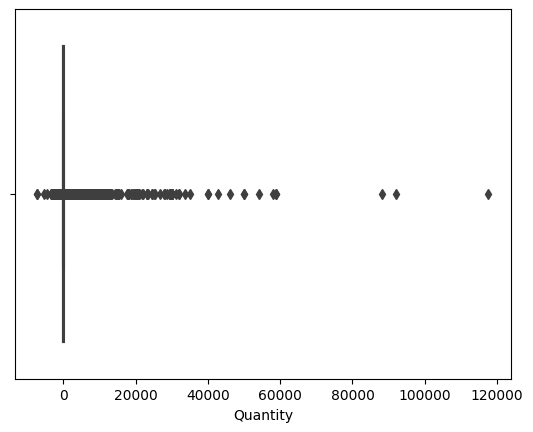

In [36]:
# To check for outliers in Fdata

sns.boxplot(x=Mdata['Quantity'])
plt.show()

In [37]:
# To confirm the outliers

from scipy.stats import zscore

Mdata['z_score'] = zscore(Mdata['Quantity'])
outlierQ = Mdata[(Mdata['z_score'] > 3) | (Mdata['z_score'] < -3)]
print(Mdata['z_score'].min(), Mdata['z_score'].max())


-9.825049678193297 157.84726489732057


In [38]:
print(outlierQ.shape)  # (number of rows, number of columns)


(1493, 12)


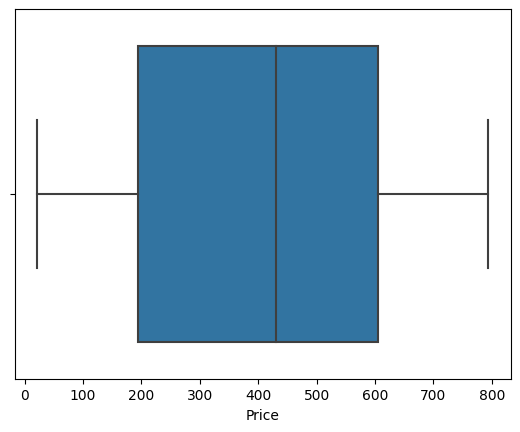

In [39]:
# To check for outliers in Fdata

sns.boxplot(x=Mdata['Price'])
plt.show()

In [40]:
# To confirm the outliers

Mdata['z_score'] = zscore(Mdata['Price'])
outlierP = Mdata[(Mdata['z_score'] > 3) | (Mdata['z_score'] < -3)]

print(Mdata['z_score'].min(), Mdata['z_score'].max())

-1.734539883843376 1.697131814380818


In [41]:
print(outlierP.shape)  # (number of rows, number of columns)


(0, 12)


#### Since the values are less than 3, it's not considered an outlier

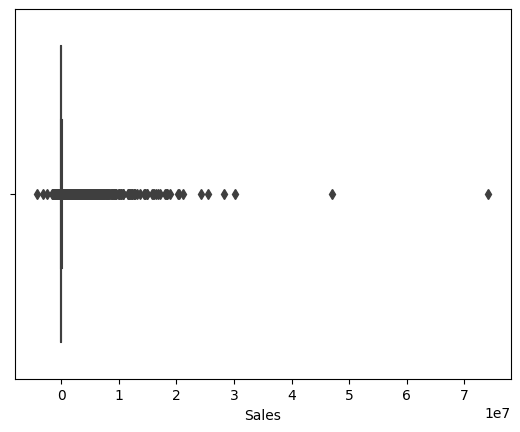

In [42]:
# To check for outliers in Fdata

sns.boxplot(x=Mdata['Sales'])
plt.show()

In [43]:
# To confirm the outliers

Mdata['z_score'] = zscore(Mdata['Sales'])
outlierS = Mdata[(Mdata['z_score'] > 3) | (Mdata['z_score'] < -3)]

print(Mdata['z_score'].min(), Mdata['z_score'].max())


-12.050814294098707 212.37411670358043


In [44]:
print(outlierS.shape)  # (number of rows, number of columns)


(1353, 12)


In [45]:
#Replacing the outliers as median values

# Calculate Z-scores
Mdata['z_score'] = zscore(Mdata['Sales'])
threshold = 3
median_value = Mdata['Sales'].median()

# Replace outliers with the median value
Mdata.loc[(Mdata['z_score'] > threshold) | (Mdata['z_score'] < -threshold), 'Sales'] = median_value

Mdata = Mdata.drop(columns=['z_score'])
print(Mdata)



          CustID   DepID ChannelID    LocID ProductID  Quantity   DisID  \
0         Cust01   Dep01     CH001    Loc01     PR001         4   Dis01   
1        Cust041  Dep012     CH003   Loc041     PR001         2   Dis01   
2         Cust01   Dep09     CH001    Loc01    PR0056        30   Dis01   
3         Cust02   Dep02     CH002    Loc02     PR002         7   Dis01   
4        Cust038  Dep012     CH001   Loc038     PR002         4   Dis01   
...          ...     ...       ...      ...       ...       ...     ...   
254077  Cust0624   Dep05     CH001  Loc0624    PR0060       919  Dis026   
254078  Cust0535   Dep04     CH001  Loc0535   PR00100       432  Dis026   
254079  Cust0596  Dep010     CH002  Loc0596   PR00221       320  Dis026   
254080  Cust0512   Dep07     CH004  Loc0512   PR00162       565  Dis026   
254081  Cust0693  Dep012     CH002  Loc0692   PR00162      1080  Dis026   

        Price   Sales  Year     Month  
0         368    1472  2018   January  
1         368     7

### Analysis

In [49]:
Mdata.head(5)

,CustID,DepID,ChannelID,LocID,ProductID,Quantity,DisID,Price,Sales,Year,Month
0,Cust01,Dep01,CH001,Loc01,PR001,4,Dis01,368,1472,2018,January
1,Cust041,Dep012,CH003,Loc041,PR001,2,Dis01,368,736,2018,January
2,Cust01,Dep09,CH001,Loc01,PR0056,30,Dis01,26,780,2018,January
3,Cust02,Dep02,CH002,Loc02,PR002,7,Dis01,591,4137,2018,January
4,Cust038,Dep012,CH001,Loc038,PR002,4,Dis01,591,2364,2018,January


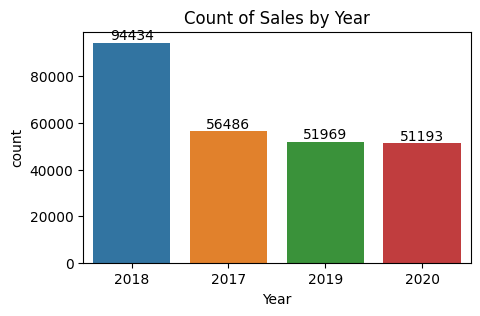

In [50]:
# Count of sales by Year

plt.figure(figsize=(5,3))
sy=sns.countplot(data=Mdata, x='Year', order= Mdata['Year'].value_counts(ascending=False).index)
values = Mdata['Year'].value_counts(ascending=False).values
sy.bar_label(container=sy.containers[0], labels=values);
plt.title('Count of Sales by Year')

plt.show();


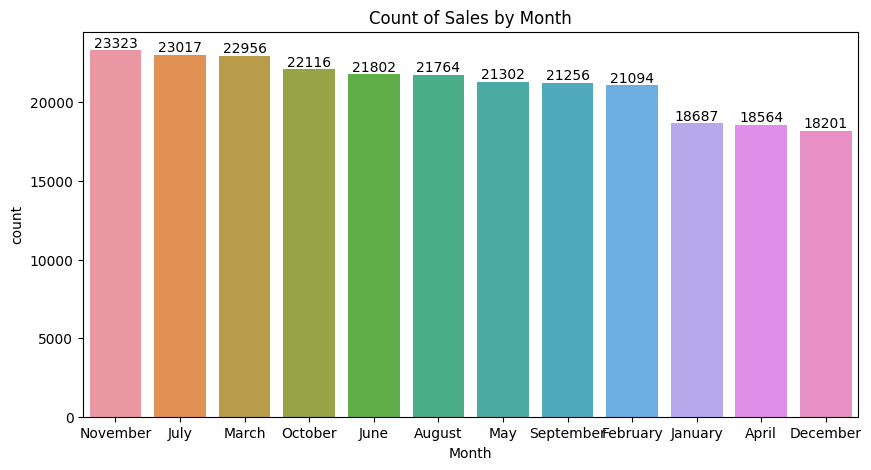

In [51]:
# Count of sales by Month

plt.figure(figsize=(10,5))
sy=sns.countplot(data=Mdata, x='Month', order= Mdata['Month'].value_counts(ascending=False).index)
values = Mdata['Month'].value_counts(ascending=False).values
sy.bar_label(container=sy.containers[0], labels=values);
plt.title('Count of Sales by Month')

plt.show();

In [52]:
# Grouping by ProductID and LocID by Sales

top_products = Mdata.groupby('ProductID')['Sales'].sum().reset_index()
top_location = Mdata.groupby('LocID')['Sales'].sum().reset_index()
top_customer = Mdata.groupby('CustID')['Sales'].sum().reset_index()
top_Department = Mdata.groupby('DepID')['Sales'].sum().reset_index()
top_channel = Mdata.groupby('ChannelID')['Sales'].sum().reset_index()
top_distributor = Mdata.groupby('DisID')['Sales'].sum().reset_index()

# Sorting by total sales in descending order
top_products = top_products.sort_values(by='Sales', ascending=False)
top_location = top_location.sort_values(by='Sales', ascending=False)
top_customer = top_customer.sort_values(by='Sales', ascending=False)
top_Department = top_Department.sort_values(by='Sales', ascending=False)
top_channel = top_channel.sort_values(by='Sales', ascending=False)
top_distributor = top_distributor.sort_values(by='Sales', ascending=False)


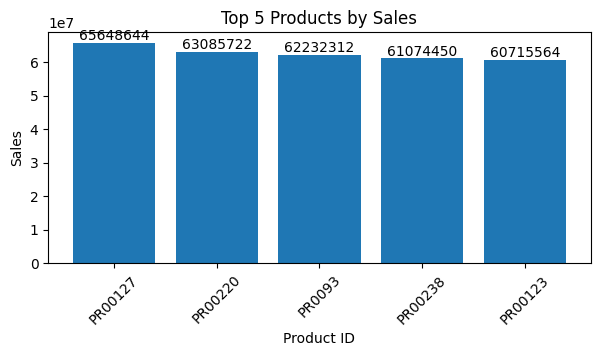

In [53]:
# Top 5 Products by Sales

plt.figure(figsize=(7, 3))
ps = plt.bar(top_products['ProductID'][:5], top_products['Sales'][:5])
plt.title('Top 5 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)

for bar in ps:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

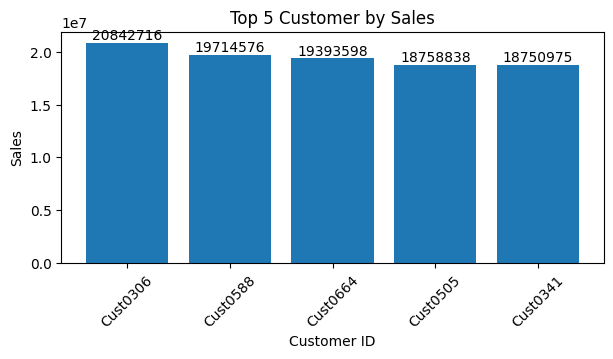

In [54]:
# Top 5 Customers by Sales

plt.figure(figsize=(7, 3))
cs = plt.bar(top_customer['CustID'][:5], top_customer['Sales'][:5])
plt.title('Top 5 Customer by Sales')
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)

for bar in cs:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

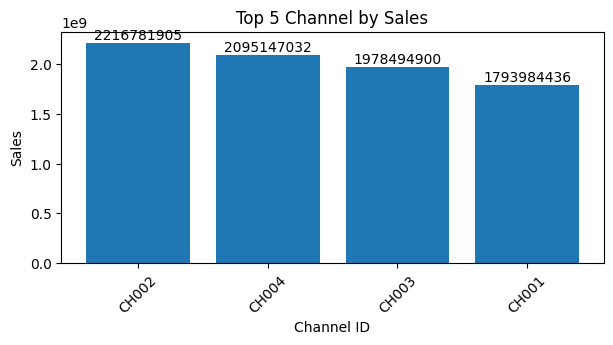

In [55]:
# Top 5 Channels by Sales

plt.figure(figsize=(7, 3))
chs = plt.bar(top_channel['ChannelID'][:5], top_channel['Sales'][:5])
plt.title('Top 5 Channel by Sales')
plt.xlabel('Channel ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)

for bar in chs:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

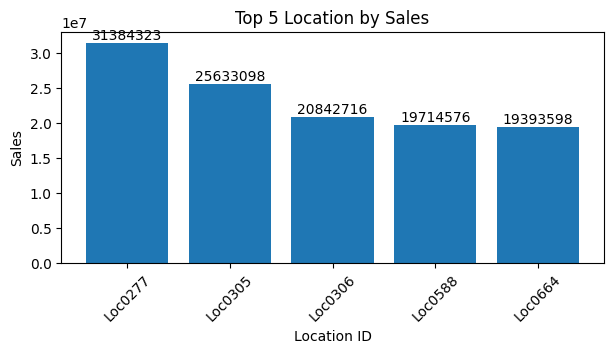

In [56]:
# Top 5 Locations by Sales

plt.figure(figsize=(7, 3))
ls = plt.bar(top_location['LocID'][:5], top_location['Sales'][:5])
plt.title('Top 5 Location by Sales')
plt.xlabel('Location ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)

for bar in ls:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

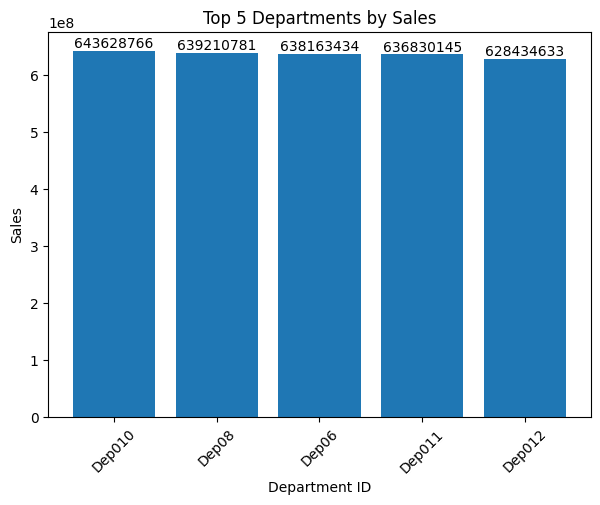

In [57]:
# Top 5 Departments by Sales

plt.figure(figsize=(7, 5))
dps = plt.bar(top_Department['DepID'][:5], top_Department['Sales'][:5])
plt.title('Top 5 Departments by Sales')
plt.xlabel('Department ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)

for bar in dps:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

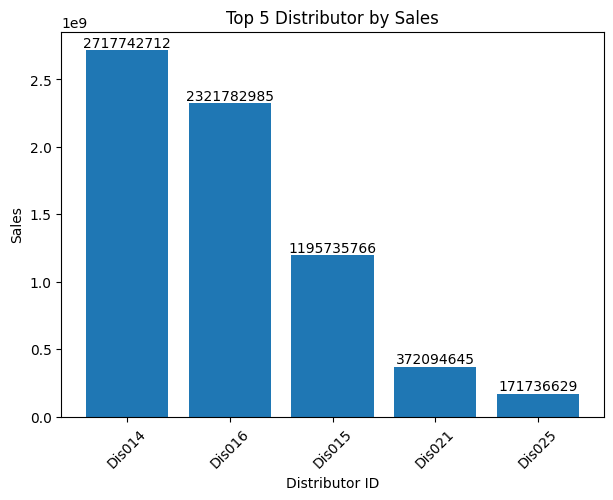

In [58]:
# Top 5 Departments by Sales

plt.figure(figsize=(7, 5))
dts = plt.bar(top_distributor['DisID'][:5], top_distributor['Sales'][:5])
plt.title('Top 5 Distributor by Sales')
plt.xlabel('Distributor ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)

for bar in dts:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

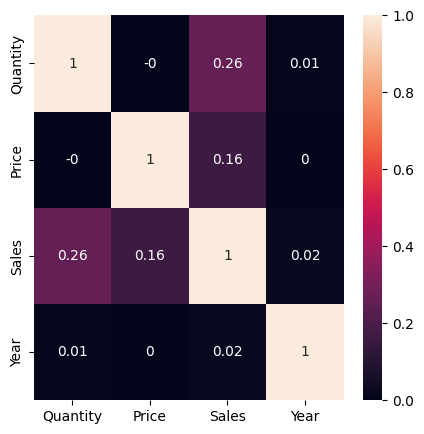

In [59]:
plt.figure(figsize=(5,5))

mx = Mdata.corr().round(2)
sns.heatmap(mx, annot=True)
plt.show();

## Geospatial and Channel Analysis

In [60]:

import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

In [61]:
Loc.head()

,LocID,City,Longitude,Country,Latitude
0,Loc01,Lublin,22.57,Poland,51.23
1,Loc02,?wiecie,18.43,Poland,53.42
2,Loc03,Rybnik,18.50,Poland,50.08
3,Loc04,Czelad?,19.08,Poland,50.33
4,Loc05,Olsztyn,20.49,Poland,53.78


In [62]:
# create a geopandas DataFrame
geometry = [Point(xy) for xy in zip(Loc['Longitude'], Loc['Latitude'])]
gloc = gpd.GeoDataFrame(Loc, geometry = geometry)
 
gloc.head(2)

,LocID,City,Longitude,Country,Latitude,geometry
0,Loc01,Lublin,22.57,Poland,51.23,POINT (22.57 51.23)
1,Loc02,?wiecie,18.43,Poland,53.42,POINT (18.43 53.42)


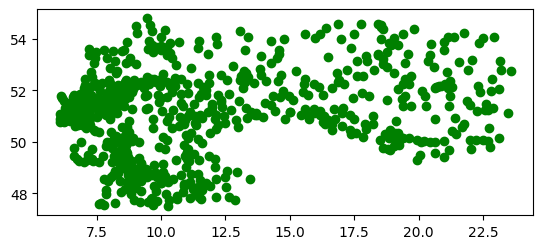

In [63]:
# Display the geopandas DataFrame on a map
gloc.plot(color = 'green')
plt.show()

In [64]:
# filter the dataframe to include only long., lat., and transaction amount
loc_filtered = result[['Longitude', 'Latitude', 'Sales']]
loc_filtered.head(2)

,Longitude,Latitude,Sales
0,22.57,51.23,1472
1,19.40,54.17,736


In [66]:
# Group by Channel and sum the sales
city_sales = result_filtered.groupby('Channel')['Sales'].sum().reset_index()

# Display the results
print(city_sales)


    Channel       Sales
0  Hospital  3938908952
1  Pharmacy  4261016855


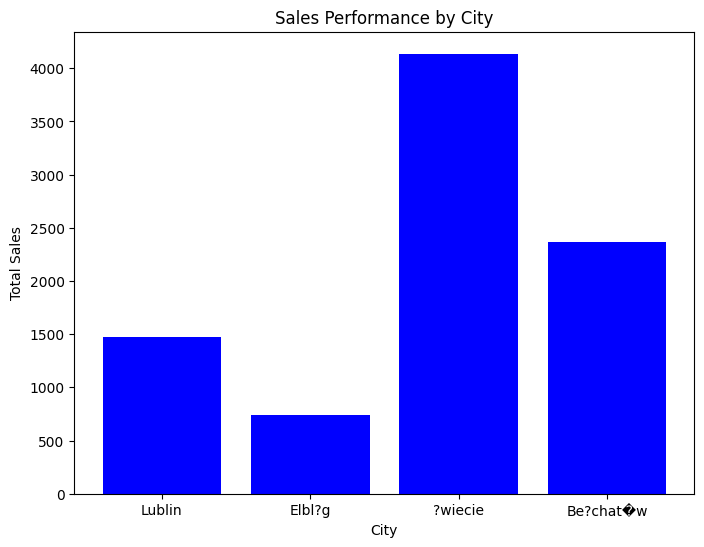

In [67]:
#Sales Performace by City

plt.figure(figsize=(8, 6))

plt.bar(result_filtered['City'][:6], result_filtered['Sales'][:6], color=['blue'])

plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Sales Performance by City')
plt.show()


## Statistical Analysis

In [69]:
#Calculate z-score to remoe outliers
print(result_filtered.isnull().sum())

result_filtered = result_filtered.dropna()


from scipy.stats import zscore
result_filtered['z_score'] = zscore(result_filtered['Sales'])
result_filtered = result_filtered[(result_filtered['z_score'] < 3) & (result_filtered['z_score'] > -3)]

result_filtered.drop(columns=['z_score'], inplace=True)


CustID           0
DepID            0
ChannelID        0
LocID            0
ProductID        0
Quantity         0
DisID            0
Price            0
Sales            0
Year             0
Month            0
ProductID        0
ProductName      0
ProductClass     0
CustID           0
Customer Name    0
ChannelID        0
Channel          0
SubChannel       0
LocID            0
City             0
Longitude        0
Country          0
Latitude         0
Distributor      0
DisID            0
dtype: int64


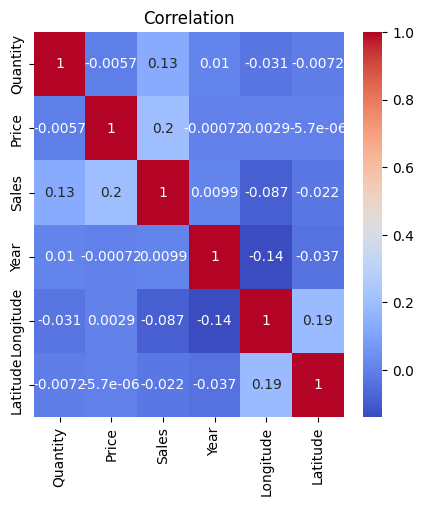

In [70]:
#Calculating correlation
corresult = result_filtered.corr()

# Visualize using a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corresult, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()


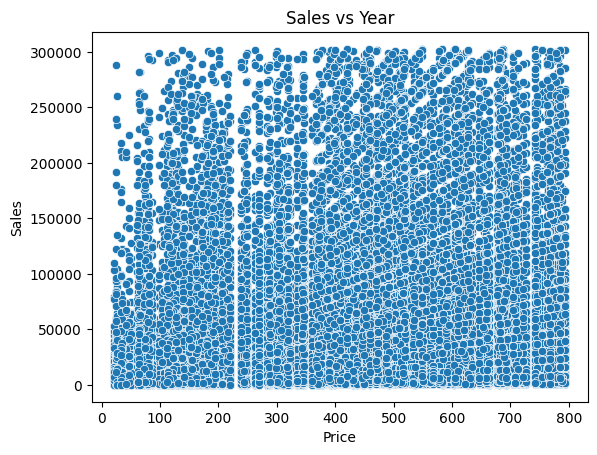

In [72]:
# Scatter plot with regression line
sns.scatterplot(x='Price', y='Sales', data=result_filtered)
plt.title('Sales vs Year')
plt.show()
